In [88]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim

[**DataSet Here !**](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbVpMd2ljVUQ4LTRQWjlNdzl1VldqbXZReFY1UXxBQ3Jtc0ttWkN0QTAtLU5DajVoZEJWQnIwekRvS0pEWnc4eFlxdng2ajdGc1RPSlZmaXZfLXhhQzdTYTVZbk1zOGxrVlhkT2RIcFRIcndCbGMtQlZ2VVBSWktjUVYzQ2RzaTIxMkd1aEQ0akxOR1V4Y1lOYkU2QQ&q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH%2Fview%3Fusp%3Dsharing&v=6EJaHBJhwDs)


In [89]:
data=pd.read_csv('/content/fmnist_small.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


**Plan of Action**


---


* DataLoader objects
* Training Loop
* Evaluation

In [90]:
torch.manual_seed(42)

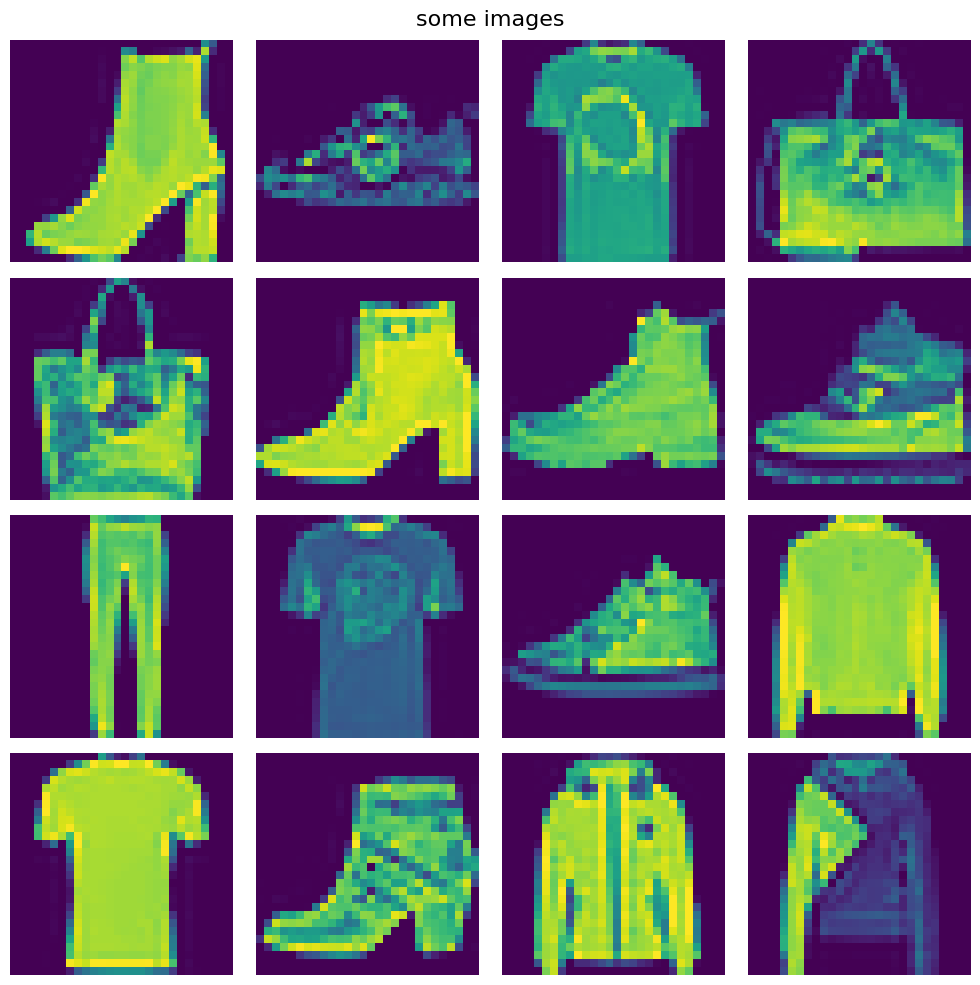

In [91]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
plt.suptitle("some images",fontsize=16)
for i ,ax in enumerate(axes.flat):
  img=data.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show( )

In [92]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [94]:
x_train=x_train/255.0
x_test=x_test/255.0

In [95]:
x_train=torch.tensor(x_train).float()
x_test=torch.tensor(x_test).float()
y_train=torch.tensor(y_train).long()
y_test=torch.tensor(y_test).long()

In [96]:
from torch.utils.data import Dataset, DataLoader

In [97]:
class my_datset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return len(self.x)

In [98]:
train_dataset=my_datset(x_train,y_train)
test_dataset=my_datset(x_test,y_test)

In [99]:
# create train and test dataloader
train_loader=DataLoader(dataset=train_dataset,batch_size=100,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=100,shuffle=False)
#for calculating accuracy shuffling can cause problem

In [100]:
# define nn class
import torch.nn as nn
class my_nn(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        # incoming and outgoing
        nn.ReLU(),
        nn.Linear(64,10)
       )

  def forward(self,x):
    return self.model(x)




In [101]:
learning_rate=0.01
epochs=100

In [102]:
# instantiate model
model=my_nn(x_train.shape[1])

In [103]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [104]:
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    # forward pass
    # calculate loss
    #back propagation
    #gradients update
    output=model(batch_features)
    loss=criterion(output,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss+=loss.item()
    # print(f'Batch Loss: {loss.item():.4f}') # Optional: uncomment to see batch loss
  print(f'Epoch {epoch+1}/{epochs}, Average Loss: {total_epoch_loss/len(train_loader):.4f}')

Epoch 1/100, Average Loss: 2.2885
Epoch 2/100, Average Loss: 2.2456
Epoch 3/100, Average Loss: 2.1900
Epoch 4/100, Average Loss: 2.1077
Epoch 5/100, Average Loss: 1.9935
Epoch 6/100, Average Loss: 1.8453
Epoch 7/100, Average Loss: 1.6809
Epoch 8/100, Average Loss: 1.5255
Epoch 9/100, Average Loss: 1.3925
Epoch 10/100, Average Loss: 1.2828
Epoch 11/100, Average Loss: 1.1944
Epoch 12/100, Average Loss: 1.1222
Epoch 13/100, Average Loss: 1.0607
Epoch 14/100, Average Loss: 1.0109
Epoch 15/100, Average Loss: 0.9687
Epoch 16/100, Average Loss: 0.9334
Epoch 17/100, Average Loss: 0.9031
Epoch 18/100, Average Loss: 0.8775
Epoch 19/100, Average Loss: 0.8551
Epoch 20/100, Average Loss: 0.8337
Epoch 21/100, Average Loss: 0.8191
Epoch 22/100, Average Loss: 0.8034
Epoch 23/100, Average Loss: 0.7878
Epoch 24/100, Average Loss: 0.7746
Epoch 25/100, Average Loss: 0.7630
Epoch 26/100, Average Loss: 0.7510
Epoch 27/100, Average Loss: 0.7417
Epoch 28/100, Average Loss: 0.7302
Epoch 29/100, Average Loss: 0

In [105]:
#Evaluation
model.eval()

my_nn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [106]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.7925
